# Changing dataframe shape

&nbsp;  
There are three additional tools for tidying data - **transposing**, **melting** and **casting**. Transposing rotates the data so that rows become columns and vice versa. Melting converts a dataframe from wide to long format, and casting is the reverse. 

In [32]:
import pandas as pd
import seaborn as sns

## Transposing
1) df=df.T to transpose 
### Additional notes on index:
1) df.reset_index to reset index if missing any, add inplace=True to edit directly on dataframe withut keeping the previous mis-indexed copy
2) df.reset_index(drop=True) to drop index

In [2]:
df=pd.read_csv('../Datasets/Infection_TPM.csv')
df

,Gene_ID,Control_Flower,Infected_Flower,Control_leaf,Infected_leaf
0,NLR_1,34,45,20,23
1,NLR_2,1,33,3,56
2,JA_34,3,321,15,543
3,JA_13,5,45,3,22
4,JA_5,21,34,31,67
5,Aux_3,4,72,7,21
6,Aux_4,6,23,2,19


In [4]:
df=df.T
df

,0,1,2,3,4,5,6
Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


The index is now the column headers and the column headers are now the index. For this dataset, it would make sense to make the first row the column headers. So new column headers are defined and the first row is dropped.

In [5]:
df.columns=df.iloc[0]
df=df[1:]
df

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


In [6]:
df.reset_index(inplace=True)
df

Gene_ID,index,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Control_Flower,34,1,3,5,21,4,6
1,Infected_Flower,45,33,321,45,34,72,23
2,Control_leaf,20,3,15,3,31,7,2
3,Infected_leaf,23,56,543,22,67,21,19


In [7]:
df[['Disease','Tissue']]=df['index'].str.split('_',expand=True)
df

/tmp/ipykernel_384/2897522401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Disease','Tissue']]=df['index'].str.split('_',expand=True)
/tmp/ipykernel_384/2897522401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Disease','Tissue']]=df['index'].str.split('_',expand=True)


Gene_ID,index,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,Control_Flower,34,1,3,5,21,4,6,Control,Flower
1,Infected_Flower,45,33,321,45,34,72,23,Infected,Flower
2,Control_leaf,20,3,15,3,31,7,2,Control,leaf
3,Infected_leaf,23,56,543,22,67,21,19,Infected,leaf


This function creates a new column called 'index'. (Note: you can add `drop = True` into the df.reset_index function and the new 'index' column will be dropped). We can now split this 'index' column to make two new columns.

In [8]:
df.reset_index(drop=True)

Gene_ID,index,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,Control_Flower,34,1,3,5,21,4,6,Control,Flower
1,Infected_Flower,45,33,321,45,34,72,23,Infected,Flower
2,Control_leaf,20,3,15,3,31,7,2,Control,leaf
3,Infected_leaf,23,56,543,22,67,21,19,Infected,leaf


In [10]:
# the previous code isn't working because index columns aren't numbers. so the code below was run:
df.drop(columns=['index'])

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,34,1,3,5,21,4,6,Control,Flower
1,45,33,321,45,34,72,23,Infected,Flower
2,20,3,15,3,31,7,2,Control,leaf
3,23,56,543,22,67,21,19,Infected,leaf


## Melting

converting from 'wide form' to 'long form'. 

 `pd.melt`. This takes the form `pd.melt(dataframe, id_vars, value_vars, var_name, value_name...)`.

- `id_vars` are the identifier variables. These are the variables (or columns) that do not contain our values. In our case, these are Disease and Tissue.
- `value_vars` are the variables (or columns) that contain our values. In our case, these are NLR_1, NLR_2, JA_34, JA_13, JA_5, Aux_3 and Aux_4.
- `var_name` is the name we want to assign to our variable column. In this case, we shall call it 'Gene_ID'.
- `value_name` is the name we want to assign to our column of values. In this case, we shall call in 'TPM'.

### Addtional notes on aggregate
collapsing multiple values into a single value (e.g., by summing or taking means)
1) df_aggregated=df_melted.groupby(['Column Name']).agg({'Integer Column Name':['maths op 1', 'maths op 2']})

In [11]:
df_melted= pd.melt(df,id_vars=['Disease','Tissue'],
       value_vars=['NLR_1', 'NLR_2', 'JA_34', 'JA_13', 'JA_5', 'Aux_3', 'Aux_4'],
       var_name='Gene_ID',
value_name='TPM')
df_melted

,Disease,Tissue,Gene_ID,TPM
0,Control,Flower,NLR_1,34
1,Infected,Flower,NLR_1,45
2,Control,leaf,NLR_1,20
3,Infected,leaf,NLR_1,23
4,Control,Flower,NLR_2,1
5,Infected,Flower,NLR_2,33
6,Control,leaf,NLR_2,3
7,Infected,leaf,NLR_2,56
8,Control,Flower,JA_34,3
9,Infected,Flower,JA_34,321


In [12]:
df_aggregated=df_melted.groupby(['Tissue']).agg({'TPM':['mean', 'std']})
df_aggregated

TPM            
             mean         std
Tissue                       
Flower  46.214286   81.727670
leaf    59.428571  140.466648

In [13]:
df_aggregated2=df_melted.groupby(['Disease']).agg({'TPM':['mean', 'std']})
df_aggregated2

TPM            
               mean         std
Disease                        
Control   11.071429   11.180094
Infected  94.571429  150.416199

## Casting

Casting is the reverse of melting i.e. it converts long form data into wide form. 

1) use `pd.pivot(dataframe, columns, index, values...)`.

- `columns` is the column that we want to use to make the new dataframe's columns. In this case, it is Gene_ID.
- `index` is the column(s) that we want to use to make the new dataframe’s index. Let's do this with 'Tissue' and 'Disease'.
- `values` is the column containing our values. In this case, it is TPM.

In [19]:
pd.pivot(df_melted,
         columns='Gene_ID',
         index=['Tissue','Disease'],
values='TPM')
        

Gene_ID         Aux_3 Aux_4 JA_13 JA_34 JA_5 NLR_1 NLR_2
Tissue Disease                                          
Flower Control      4     6     5     3   21    34     1
       Infected    72    23    45   321   34    45    33
leaf   Control      7     2     3    15   31    20     3
       Infected    21    19    22   543   67    23    56

### More practice with tidy data
1) `df.fillna(method = 'ffill', inplace = True)`.
 "ffill" means forward fill. It takes the last non-missing value and carries it downward into the next missing (NaN) cell(s)
2) df.query("condition")
filter rows in a DataFrame using a string expression

In [21]:
leaves=pd.read_csv('../Datasets/Leaves.csv')
leaves

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,4,5,6,7,8,9,10,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,7,4,4,10,9,7,6,4,5,8,Adaxial
1,NaN,NaN,NaN,NaN,NaN,1,7,6,6,4,8,4,0,0,4,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,4,7,3,7,6,8,3,4,5,5,Adaxial
3,NaN,NaN,NaN,NaN,NaN,1,9,4,6,2,3,6,4,0,8,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,9,6,3,3,6,8,1,6,1,1,Adaxial
5,NaN,NaN,NaN,NaN,NaN,2,3,6,2,5,3,1,2,6,5,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,9,5,5,8,6,4,7,0,4,3,Adaxial
7,NaN,NaN,NaN,NaN,NaN,1,9,2,3,5,0,2,4,2,8,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,10,0,8,1,5,2,7,12,6,5,Adaxial
9,NaN,NaN,NaN,NaN,NaN,1,9,7,6,4,5,5,6,4,2,Abaxial


In [23]:
leaves.fillna(method='ffill', inplace=True)
leaves

/tmp/ipykernel_384/2191129997.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  leaves.fillna(method='ffill', inplace=True)


,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,4,5,6,7,8,9,10,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,7,4,4,10,9,7,6,4,5,8,Adaxial
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,7,6,6,4,8,4,0,0,4,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,4,7,3,7,6,8,3,4,5,5,Adaxial
3,MK_560_2,ddm1/+,223.0,43.0,14.0,1,9,4,6,2,3,6,4,0,8,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,9,6,3,3,6,8,1,6,1,1,Adaxial
5,MK_560_3,wt,432.0,12.0,67.0,2,3,6,2,5,3,1,2,6,5,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,9,5,5,8,6,4,7,0,4,3,Adaxial
7,MK_560_4,ddm1/+,189.0,37.0,10.0,1,9,2,3,5,0,2,4,2,8,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,10,0,8,1,5,2,7,12,6,5,Adaxial
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,1,9,7,6,4,5,5,6,4,2,Abaxial


The identifier variables are 'Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3' and 'Side'. The values (or observations) are contained in the columns '1', '2' and '3'. Call variable name 'Sample' and  value name 'Count'.

In [28]:
leaves_melted=pd.melt(leaves, 
                      id_vars=['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3','Side'],
                     value_vars=['1', '2', '3'],
                     var_name='Sample',
                     value_name='Count')
leaved_melted

,Plant,Genotype,ADH1,SSC2,SSC3,Side,Sample,Count
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Adaxial,1,7
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Abaxial,1,1
2,MK_560_2,ddm1/+,223.0,43.0,14.0,Adaxial,1,4
3,MK_560_2,ddm1/+,223.0,43.0,14.0,Abaxial,1,1
4,MK_560_3,wt,432.0,12.0,67.0,Adaxial,1,9
5,MK_560_3,wt,432.0,12.0,67.0,Abaxial,1,2
6,MK_560_4,ddm1/+,189.0,37.0,10.0,Adaxial,1,9
7,MK_560_4,ddm1/+,189.0,37.0,10.0,Abaxial,1,1
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Adaxial,1,10
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Abaxial,1,1


What is the mean and sd for hair count on the adaxial and abaxial sides of the leaf?

In [34]:
leaves_aggregated= leaves_melted.groupby(['Side']).agg({'Count':['mean','std']})
leaves_aggregated

Count          
             mean       std
Side                       
Abaxial  3.888889  3.269986
Adaxial  5.555556  2.548869

What is the mean and sd for hair count on ddm1/ddm1, ddm/+ and +/+ leaves?

In [36]:
leaves_melted.groupby(['Genotype']).agg({'Count':['mean','std']})

Count          
               mean       std
Genotype                     
ddm1/+     4.277778  3.005985
ddm1/ddm1  5.333333  3.312053
wt         4.833333  2.639444

And grouping by Side and Genotype?

In [41]:
leaves_side_genotype=leaves_melted.groupby(['Genotype', 'Side'])
leaves_side_genotype

What is the mean hair count by side for plants with ADH1 expression over 200?  Use df_melt.query("ADH1 > 200").groupby()

In [44]:
leaves_melted.query("ADH1 > 200").groupby(['Side']).agg({'Count':'mean'})

,Count
Side,
Abaxial,3.866667
Adaxial,5.400000


And finally, use the following code to show the difference in hair counts between the adaxial and abaxial sides of the leaf for the different genotypes: `sns.catplot(x = 'Genotype', y = 'Count', hue = 'Side', data = df_melt, kind = 'bar');`.

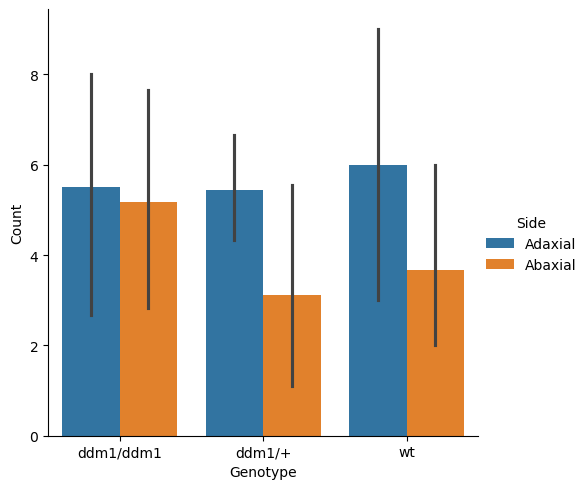

In [46]:
sns.catplot(x = 'Genotype', y = 'Count', hue = 'Side', data = leaves_melted, kind = 'bar')